# K-means

## 1. Dataset

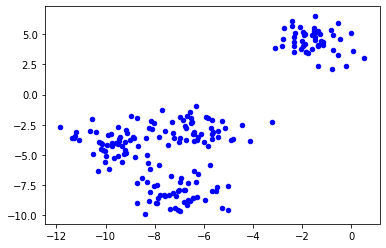

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=200, n_features=2, centers=4, random_state=1)
plt.scatter(X[:,0], X[:,1],20.0,'b')
plt.show()

## 2. Modelo

In [2]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=1)

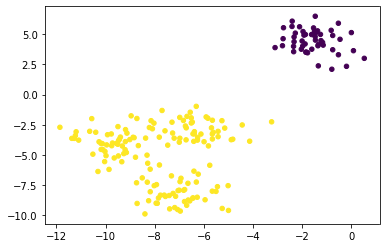

In [3]:
# Graficamos
Y = kmeans.predict(X)
plt.scatter(X[:,0],X[:,1],20.0,Y)
plt.show()

Utilizando 3 centros

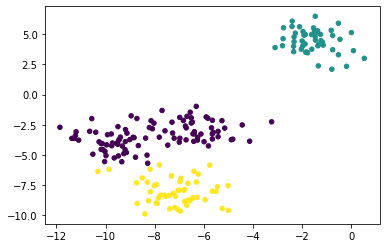

In [4]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(X)
Y = kmeans.predict(X)
plt.scatter(X[:,0],X[:,1],20.0,Y)
plt.show()

Mejorando los graficos

In [7]:
# Centros
C = kmeans.cluster_centers_
C

array([[-8.03529126, -3.42354791],
       [-1.54465562,  4.4600113 ],
       [-7.15632049, -8.05234186]])

In [24]:
import numpy as np
# Limites de decision
def plot_clusters(X,model,n):
  model.fit(X)
  Y = model.predict(X)
  C = model.cluster_centers_
  x_min, x_max = X[:,0].min() - 1.0, X[:,0].max() + 1.0
  y_min, y_max = X[:,1].min() - 1.0, X[:,1].max() + 1.0
  xx, yy = np.meshgrid(np.linspace(x_min,x_max,n), np.linspace(y_min,y_max,n))
  cm = plt.get_cmap('Spectral')
  z = model.predict(np.c_[xx.ravel(),yy.ravel()])
  z = z.reshape(xx.shape)
  plt.contourf(xx, yy, z, cmap=cm, alpha=0.6)
  plt.scatter(X[:,0],X[:,1],20.0,Y, cmap=cm)
  plt.scatter(C[:,0],C[:,1],30.0,'k')
  plt.show()

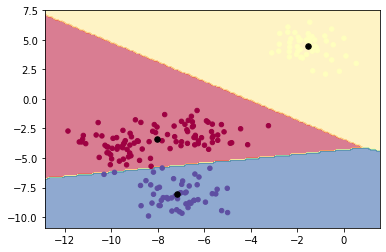

In [25]:
# 3 centros
plot_clusters(X,kmeans,150)

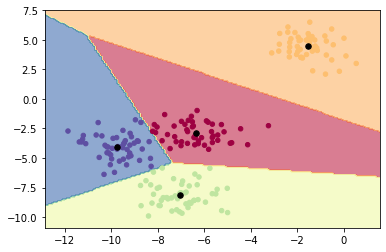

In [26]:
# 4 centros
plot_clusters(X,KMeans(4),150)

Comportamiento del modelo en clusters no lineales

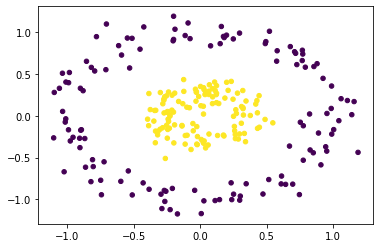

In [32]:
from sklearn.datasets import make_circles
X, Y = make_circles(250, noise=0.1, random_state=1, factor=0.3)
plt.scatter(X[:,0],X[:,1],20.0,Y)
plt.show()

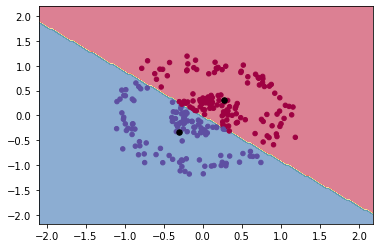

In [33]:
plot_clusters(X,KMeans(2),150)

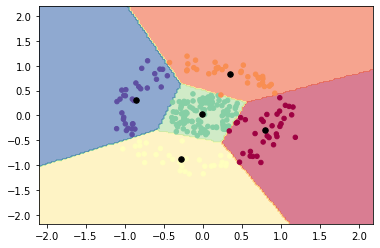

In [34]:
plot_clusters(X,KMeans(5),150)

## 3. Inercia

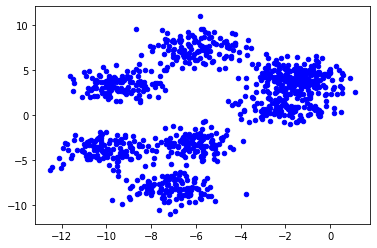

In [41]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=8, random_state=1)
plt.scatter(X[:,0], X[:,1],20.0,'b')
plt.show()

Analisis de inercia

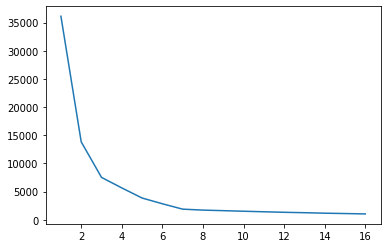

In [42]:
n_clusters = list(range(1,17))
inercias = []
for n in n_clusters:
  km = KMeans(n)
  km.fit(X)
  inercias.append(km.inertia_)
plt.plot(n_clusters, inercias)
plt.show()

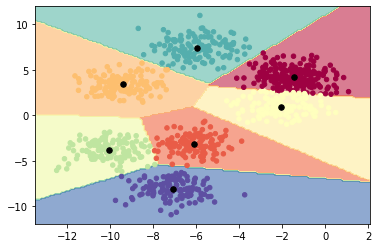

In [43]:
plot_clusters(X,KMeans(7),150)

## 4. Silhouette Score

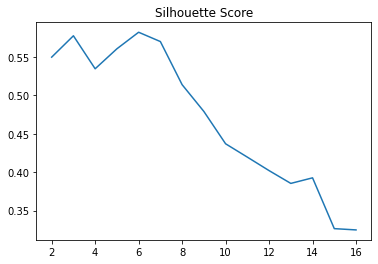

In [46]:
from sklearn.metrics import silhouette_score
n_clusters = list(range(2,17))
sscore = []
for n in n_clusters:
  km = KMeans(n)
  km.fit(X)
  Y = km.predict(X)
  sscore.append(silhouette_score(X,Y))
plt.title('Silhouette Score')
plt.plot(n_clusters, sscore)
plt.show()

## 5. Indice de Calinski-Harabasz

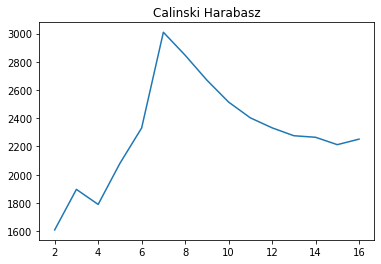

In [48]:
from sklearn.metrics import calinski_harabasz_score
n_clusters = list(range(2,17))
sscore = []
for n in n_clusters:
  km = KMeans(n)
  km.fit(X)
  Y = km.predict(X)
  sscore.append(calinski_harabasz_score(X,Y))
plt.title('Calinski Harabasz')
plt.plot(n_clusters, sscore)
plt.show()

## 6. Inestabilidad de un cluster

Dataset

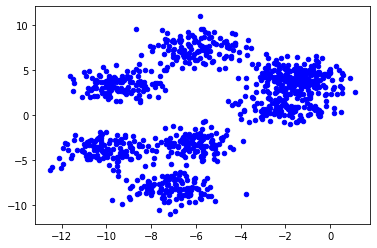

In [49]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=8, random_state=1)
plt.scatter(X[:,0], X[:,1],20.0,'b')
plt.show()

Dataset con ruido

In [50]:
X_noise = []
for _ in range(10):
  Xn = np.ndarray(shape=(1000, 2))
  for i,x in enumerate(X):
    if np.random.uniform(0,1) < 0.3:
      Xn[i] = X[i] + np.random.uniform(-2.5, 2.5)
    else:
      Xn[i] = X[i]
  X_noise.append(Xn)

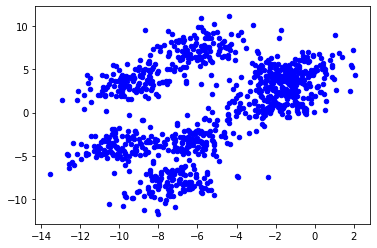

In [51]:
plt.scatter(X_noise[0][:,0], X_noise[0][:,1],20.0,'b')
plt.show()

Inestabilidad

In [53]:
from sklearn.metrics.pairwise import pairwise_distances
n_clusters = list(range(2,17))
inestabilities = []
for n in n_clusters:
  Yn = []
  for Xn in X_noise:
    km = KMeans(n)
    Yn.append(km.fit_predict(Xn))
  distances = []
  for i in range(len(Yn)):
    for j in range(i, len(Yn)):
      d = pairwise_distances(Yn[i].reshape(-1,1), Yn[j].reshape(-1,1),'hamming')
      distances.append(d[0,0])
  inestability = 2*sum(distances) / 10.0**2
  inestabilities.append(inestability)

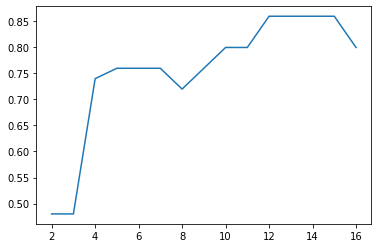

In [54]:
plt.plot(n_clusters, inestabilities)
plt.show()

## 7. Evaluacion con las clases correctas

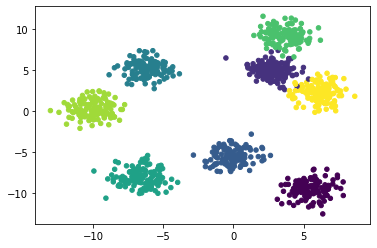

In [57]:
#Dataset
X, y = make_blobs(n_samples=1000, n_features=2, centers=8, random_state=10)
plt.scatter(X[:,0], X[:,1],20.0,y)
plt.show()

### 7.1. Homogeneidad

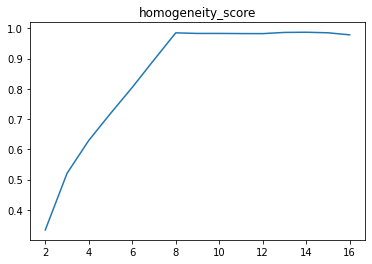

In [58]:
from sklearn.metrics import homogeneity_score
n_clusters = list(range(2,17))
sscore = []
for n in n_clusters:
  km = KMeans(n)
  Yp = km.fit_predict(X)
  sscore.append(homogeneity_score(y,Yp))
plt.title('homogeneity_score')
plt.plot(n_clusters, sscore)
plt.show()

### 7.2. Completeness

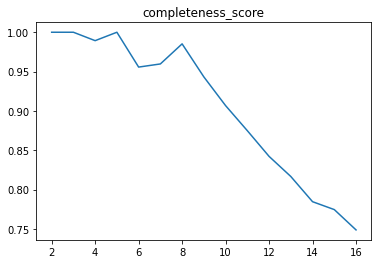

In [59]:
from sklearn.metrics import completeness_score
n_clusters = list(range(2,17))
sscore = []
for n in n_clusters:
  km = KMeans(n)
  Yp = km.fit_predict(X)
  sscore.append(completeness_score(y,Yp))
plt.title('completeness_score')
plt.plot(n_clusters, sscore)
plt.show()

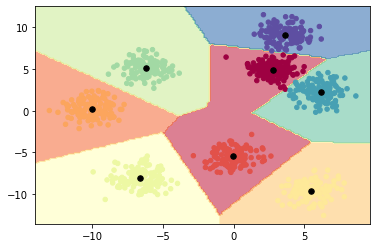

In [67]:
plot_clusters(X,KMeans(8),150)

### 7.3. Indice Rand

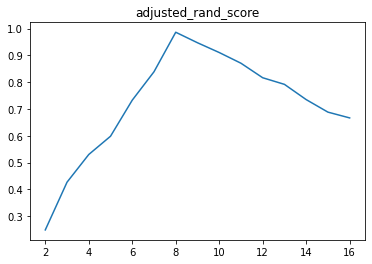

In [68]:
from sklearn.metrics import adjusted_rand_score
n_clusters = list(range(2,17))
sscore = []
for n in n_clusters:
  km = KMeans(n)
  Yp = km.fit_predict(X)
  sscore.append(adjusted_rand_score(y,Yp))
plt.title('adjusted_rand_score')
plt.plot(n_clusters, sscore)
plt.show()